In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from keras.preprocessing import image
from keras.models import load_model

In [2]:
# 可视化中间激活
model = load_model('cats_and_dogs_small_2.h5')

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 128)       147584    
__________

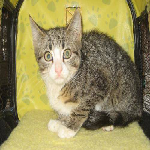

In [61]:
# 预处理单张图像
img_path = "/Users/a2017148/Downloads/datasets/cats_and_dogs_small/train/cats/cat.389.jpg"
img = image.load_img(img_path, target_size=(150, 150))
img

In [62]:
img_tensor = image.img_to_array(img)
img_tensor.shape

(150, 150, 3)

In [63]:
img_tensor = np.expand_dims(img_tensor, axis=0)

In [64]:
img_tensor /= 255.

In [65]:
img_tensor.shape

(1, 150, 150, 3)

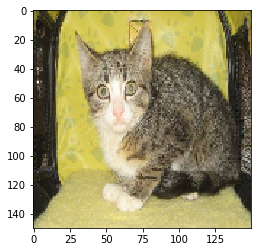

In [66]:
plt.imshow(img_tensor[0]) 
plt.show()

In [67]:
from keras import models

# 提取前 8 层的输出
layer_outputs = [layer.output for layer in model.layers[:8]]
# 创建一个模型，给定模型输入，可以返回这些输出
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [68]:
activations = activation_model.predict(img_tensor)

In [69]:
activations[0].shape

(1, 148, 148, 32)

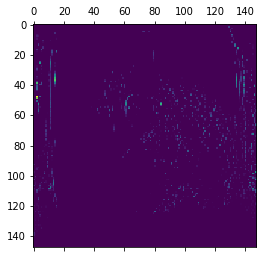

In [70]:
# 第一个卷积层的激活如下
first_layer_activation = activations[0]
# 查看第四个通道
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

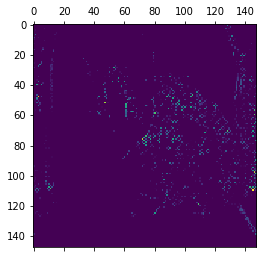

In [71]:
# 查看第七个通道
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

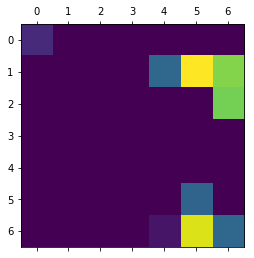

In [72]:
plt.matshow(activations[7][0, :, :, 1], cmap='viridis')

In [73]:
img_tensor.shape

(1, 150, 150, 3)

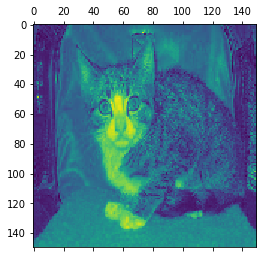

In [74]:
plt.matshow(img_tensor[0, :, :, 2], cmap='viridis')

In [75]:
# 将每个中间激活的所有通道可视化

In [76]:
import keras

# 每层的名称
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
layer_names

['conv2d_11',
 'max_pooling2d_9',
 'conv2d_12',
 'max_pooling2d_10',
 'conv2d_13',
 'max_pooling2d_11',
 'conv2d_14',
 'max_pooling2d_12']

/Users/a2017148/.local/share/virtualenvs/pylab--mHOjq_e/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


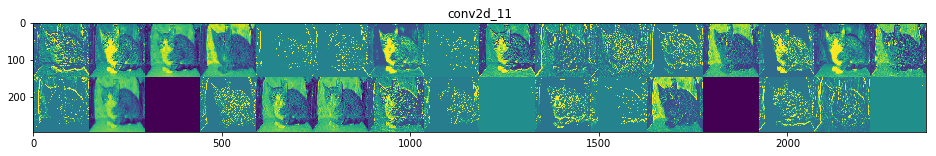

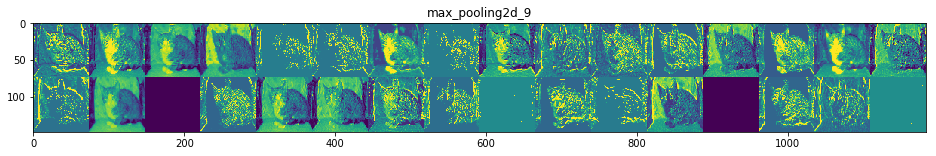

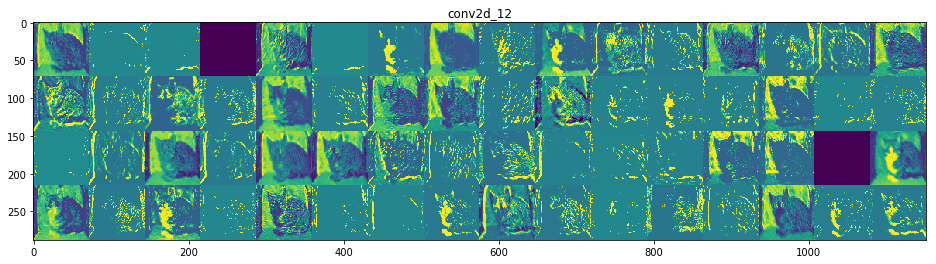

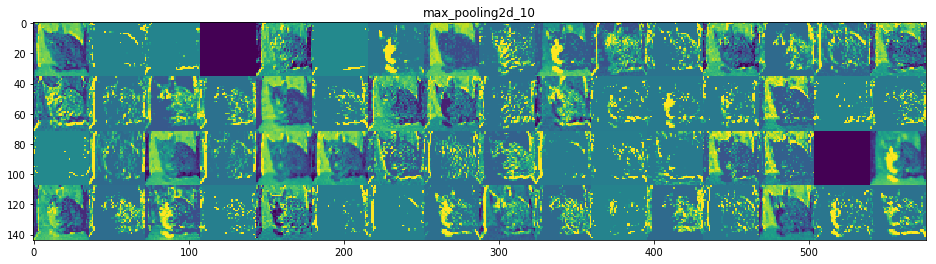

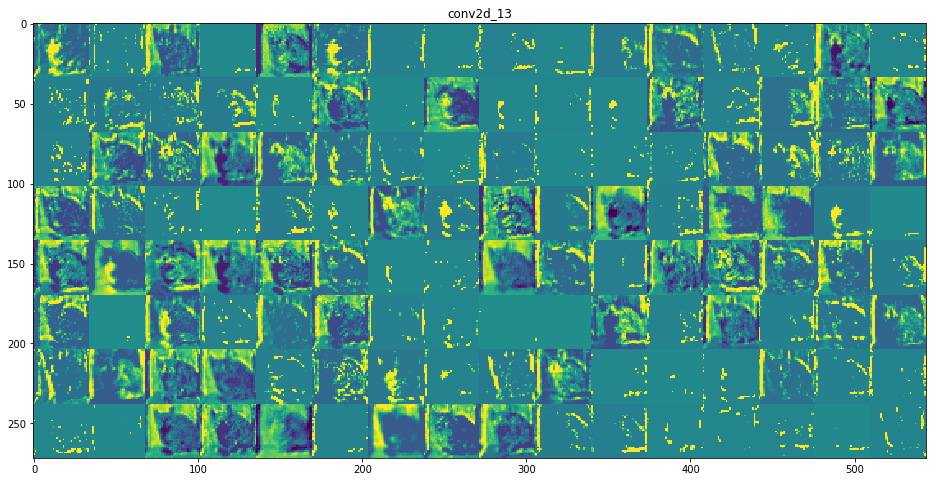

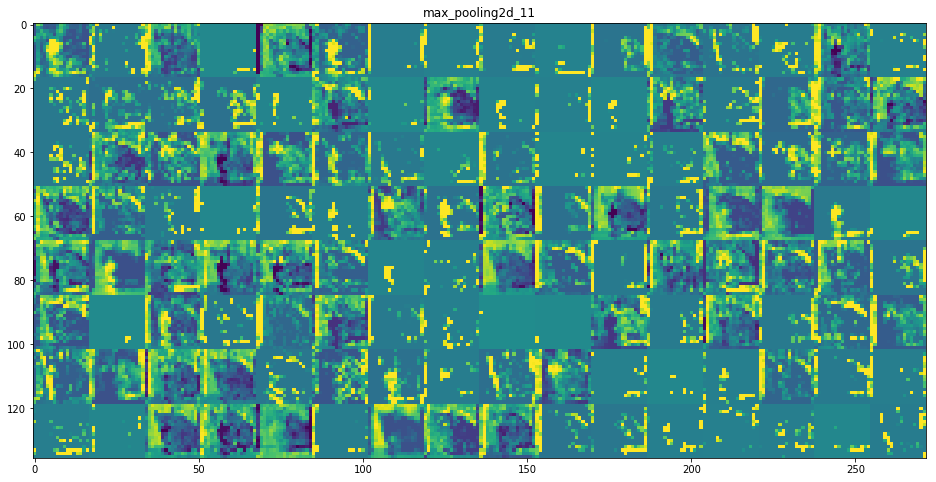

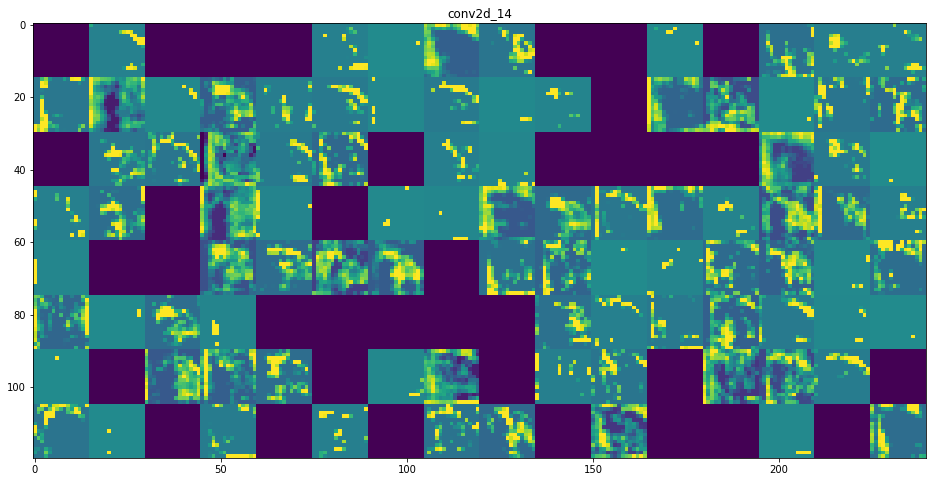

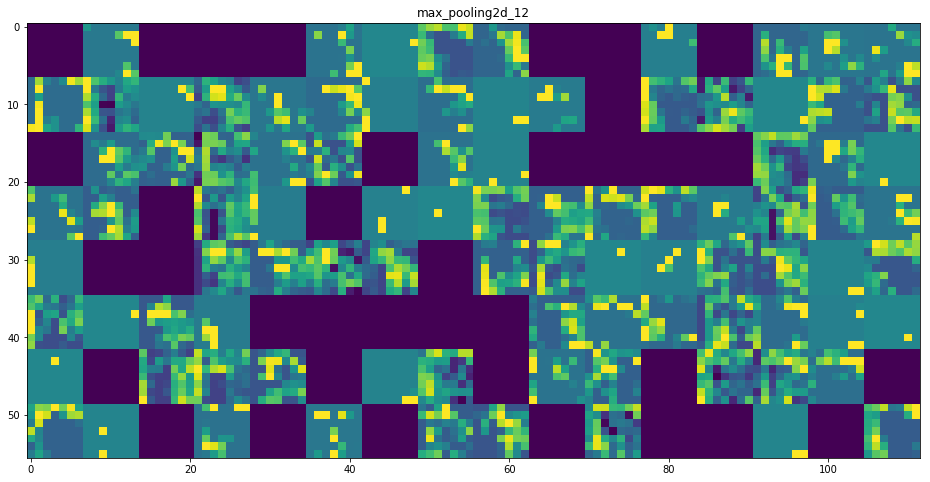

In [77]:
images_per_row = 16

# 显示 feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # feature map 个数
    n_features = layer_activation.shape[-1]

    # 特征图形状 (1, size, size, n_features)
    size = layer_activation.shape[1]

    # 平铺这个矩阵中的激活通道
    n_cols = n_features // images_per_row
    # 这一层所有通道图片组合的长宽值
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [78]:
# 可视化卷积神经网络的过滤器